# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
data.head()

In [ ]:
test.head()

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
data.describe(include = 'O')

In [ ]:
data.isna().sum()

In [ ]:
#numerical = data.select_dtypes(include = ['int64', 'float64']).columns.tolist()
numerical = ['Age', 'Fare', 'SibSp', 'Parch']
numerical

In [ ]:
#categorical = data.select_dtypes(include = ['object']).columns.tolist()
categorical = ['Sex', 'Cabin', 'Embarked', 'Pclass']
categorical

## Numerical Features

In [ ]:
data[numerical].hist(figsize = (10,4))
plt.tight_layout()

In [ ]:
sns.countplot(x = data['SibSp'])

In [ ]:
sns.countplot(x = data['Parch'])

In [ ]:
fig, ax = plt.subplots(2,2, sharex = False)

sns.kdeplot(data['Age'], ax = ax[0,0])
sns.kdeplot(data['Fare'], ax = ax[0,1])
sns.boxplot(x = data['Age'], ax = ax[1,0])
sns.boxplot(x = data['Fare'], ax = ax[1,1])

plt.tight_layout()

In [ ]:
fig, ax = plt.subplots(2,2, sharex = False)

sns.kdeplot(data['SibSp'], ax = ax[0,0])
sns.kdeplot(data['Parch'], ax = ax[0,1])
sns.boxplot(x = data['SibSp'], ax = ax[1,0])
sns.boxplot(x = data['Parch'], ax = ax[1,1])

plt.tight_layout()

In [ ]:
# for feature in [ 'Pclass', 'Parch', 'SibSp']:
#     print(feature)
#     print(data[feature].value_counts())

## Categorical Features

In [ ]:
categorical

In [ ]:
for feature in categorical:
    print('feature ' + feature + ' has unique values:')
    print(data[feature].nunique())
    print()

In [ ]:
data['Embarked'].unique()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

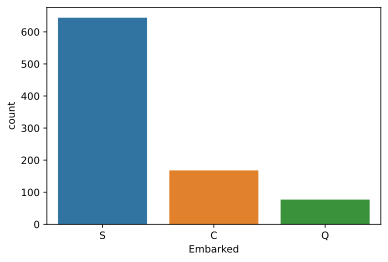

In [26]:
sns.countplot(x = data['Embarked'])

In [ ]:
sns.countplot(x = data['Sex'])

In [ ]:
data['Cabin']

In [ ]:
data['Ticket']

## Correlation and Target Variable

In [ ]:
plt.pie(data['Survived'].value_counts(), labels = ['Died', 'Survived'], autopct = '%1.1f%%')
plt.title('Proportion of Survived')
plt.show()

In [ ]:
sns.heatmap(data.corr().abs())

### Categorical

In [ ]:
categorical

In [ ]:
sns.countplot(x = data['Pclass'], hue = data['Survived'])
plt.title('Survival Distribution Across Pclass (Ticket Class)')
plt.show()

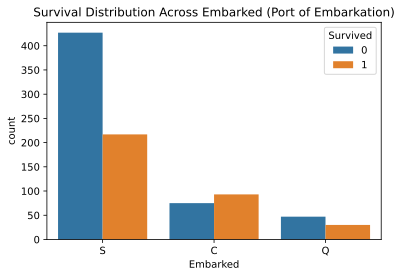

In [25]:
sns.countplot(x = data['Embarked'], hue = data['Survived'])
plt.title('Survival Distribution Across Embarked (Port of Embarkation)')
plt.show()

In [ ]:
ax = sns.countplot(x = data['Sex'], hue = data['Survived'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Distribution Across Sex')
plt.show()   

In [ ]:
male = data[data['Sex'] == 'male']
survived_male_age = male[male['Survived'] == 1]['Age']
sns.histplot(x = survived_male_age)
plt.title('Age Distribution of Survived Males')
plt.show()

In [ ]:
female = data[data['Sex'] == 'female']
survived_female_age = female[female['Survived'] == 1]['Age']
sns.histplot(x = survived_female_age)
plt.title('Age Distribution of Survived Females')
plt.show()

In [ ]:
mf = pd.concat([survived_male_age, survived_female_age],ignore_index = True, axis = 1)
sns.histplot(data = mf, kde = True)
plt.legend(['Male', 'Female'])
plt.xlabel('Age')
plt.show()

### Numerical

In [ ]:
numerical

In [ ]:
sns.scatterplot(x = data['Age'], y = data['Fare'], hue = data['Survived'] )
plt.ylim(0,600)

In [ ]:
numerical

In [ ]:
ax = sns.countplot(x = data['SibSp'], hue = data['Survived'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Distribution Across Number of SIblings')
plt.show()   

In [ ]:
ax = sns.countplot(x = data['Parch'], hue = data['Survived'])
for container in ax.containers:
    ax.bar_label(container)
plt.title('Survival Distribution Across Number of parents/children')
plt.show()   

In [ ]:
sns.scatterplot(x = data['Age'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['Fare'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['SibSp'], y = data['Survived'])
plt.show()

sns.scatterplot(x = data['Parch'], y = data['Survived'])
plt.show()

# Data Preprocessing

## Feature Engineering

<font size="5">Name</font>

In [4]:
data['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

https://www.w3schools.com/python/python_regex.asp Regular expressions for Series.str.extract()
https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html 

In [5]:
data['Title'] =  data['Name'].str.extract('([a-zA-Z]+)\.')
data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [6]:
test['Title'] = test['Name'].str.extract('([a-zA-Z]+)\.')
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

In [7]:
def title(name):
    if name == 'Mr':
        return 'Mr'
    elif name == 'Mrs':
        return 'Mrs'
    elif name == 'Miss':
        return 'Miss'
    elif name == 'Master':
        return 'Master'
    else:
        return 'Other'

In [8]:
data['Title'] = data['Title'].map(title)
test['Title'] = test['Title'].map(title)

In [9]:
data = data.drop('Name', axis = 1)
test = test.drop('Name', axis = 1)

In [10]:
data['Relatives'] = data['SibSp'] + data['Parch']

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Relatives', ylabel='count'>

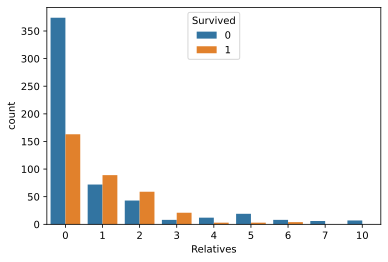

In [16]:
sns.countplot(data['Relatives'], hue = data['Survived'])

In [11]:
data = data.drop(['SibSp', 'Parch'], axis = 1)
data

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Relatives
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,female,35.0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,male,35.0,373450,8.0500,NaN,S,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,211536,13.0000,NaN,S,Other,0
887,888,1,1,female,19.0,112053,30.0000,B42,S,Miss,0
888,889,0,3,female,NaN,W./C. 6607,23.4500,NaN,S,Miss,3
889,890,1,1,male,26.0,111369,30.0000,C148,C,Mr,0


In [12]:
test['Relatives'] = test['SibSp'] + test['Parch']
test = test.drop(['SibSp', 'Parch'], axis = 1)
test

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Relatives
0,892,3,male,34.5,330911,7.8292,NaN,Q,Mr,0
1,893,3,female,47.0,363272,7.0000,NaN,S,Mrs,1
2,894,2,male,62.0,240276,9.6875,NaN,Q,Mr,0
3,895,3,male,27.0,315154,8.6625,NaN,S,Mr,0
4,896,3,female,22.0,3101298,12.2875,NaN,S,Mrs,2
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,A.5. 3236,8.0500,NaN,S,Mr,0
414,1306,1,female,39.0,PC 17758,108.9000,C105,C,Other,0
415,1307,3,male,38.5,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0
416,1308,3,male,NaN,359309,8.0500,NaN,S,Mr,0


## Missing Values

In [ ]:
data.isna().sum()

In [ ]:
test.isna().sum()

<font size="5">Age</font>

In [ ]:
data.corr()['Age'] 

In [ ]:
sns.boxplot(x = data['Age'], y = data['Title'])

In [ ]:
data.groupby('Title').median()

In [ ]:
data.groupby('Title').median()['Age']

In [ ]:
data.head()

In [ ]:
# data.loc[0,'Age'] == np.nan

In [ ]:
data[data['Age'] == 0]

In [17]:
data['Age'] = data['Age'].fillna(0)

In [ ]:
data[data['Age'] == 0]

In [ ]:
data.loc[888]

In [ ]:
# data.loc[888,'Title']

In [ ]:
# data.groupby('Title').median()['Age']['Miss']

In [ ]:
# data.groupby('Title').median()['Age'][data.loc[888,'Title']]

In [18]:
for i in range(len(data)):
    if data.loc[i, 'Age'] == 0:
        median_value_by_title = data.groupby('Title').median()['Age'][data.loc[i,'Title']]
        data.loc[i,'Age'] =  median_value_by_title

In [19]:
test['Age'] = test['Age'].fillna(0)

In [20]:
for i in range(len(test)):
    if test.loc[i, 'Age'] == 0:
        median_value_by_title = test.groupby('Title').median()['Age'][test.loc[i,'Title']]
        test.loc[i,'Age'] =  median_value_by_title

In [ ]:
# data['Age'] = data['Age'].fillna(data['Age'].median())

In [ ]:
# test['Age'] = test['Age'].fillna(test['Age'].median())

<font size="5">Fare</font>

In [21]:
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

In [40]:
# data[data['Embarked'].isna()]

In [39]:
# data[data['Ticket'] == 'CA. 2343']

In [38]:
# data['Ticket'].value_counts()

In [41]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [ ]:
# data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])
# test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0])

In [ ]:
# df = df.dropna(axis = 0).reset_index(drop = True)
# test = test.dropna(axis = 0).reset_index(drop = True)

## Data Preprocessing

Outliers 

In [47]:
# test.loc[test['Fare'] > 300, 'Fare']

343    512.3292
Name: Fare, dtype: float64

In [ ]:
# data.loc[data['Fare'] > 300, 'Fare'] = data['Fare'].mean()
# test.loc[test['Fare'] > 300, 'Fare'] = test['Fare'].mean()

In [48]:
data.loc[data['Fare'] > 300, 'Fare'] = data.loc[data['Fare'] < 300, 'Fare'].max()

In [49]:
test.loc[test['Fare'] > 300, 'Fare'] = test.loc[test['Fare'] < 300, 'Fare'].max()

In [50]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked,Title,Relatives
0,1,0,3,male,22.0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,female,38.0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1,3,female,26.0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1,1,female,35.0,113803,53.1000,C123,S,Mrs,1
4,5,0,3,male,35.0,373450,8.0500,NaN,S,Mr,0


In [94]:
df = data.drop(['PassengerId','Ticket', 'Cabin'], axis = 1)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Relatives
0,0,3,male,22.0,7.2500,S,Mr,1
1,1,1,female,38.0,71.2833,C,Mrs,1
2,1,3,female,26.0,7.9250,S,Miss,0
3,1,1,female,35.0,53.1000,S,Mrs,1
4,0,3,male,35.0,8.0500,S,Mr,0


In [95]:
test = test.drop(['PassengerId',  'Ticket', 'Cabin'], axis = 1)
test.head()

KeyError: "['PassengerId' 'Ticket' 'Cabin'] not found in axis"

### One hot Encoding

In [ ]:
# cat = ['Sex', 'Embarked', 'Pclass']
# num = ['Age', 'SibSp', 'Parch', 'Fare']

In [ ]:
# ## lets try to encode only Embarked and Sex:
# cat = ['Sex', 'Embarked']
# num = ['Age', 'SibSp', 'Parch', 'Fare', 'Pclass']

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# encoder = OneHotEncoder(handle_unknown = 'ignore')  # As discussed above, the handle_unknown is false because the model will see
#                                                         #new categories in the test dataset
# X_2 = encoder.fit_transform(X[cat]) # fit_transform to train data but only transform to test
# test_2 = encoder.transform(test[cat])

# X_encoded = pd.DataFrame(X_2.toarray())
# test_encoded = pd.DataFrame(test_2.toarray())
# X_encoded.set_index(X.index, inplace = True)
# test_encoded.set_index(test.index, inplace = True)

In [ ]:
# X = pd.concat([X[num], X_encoded], axis = 1)     # Concatenate numerical features with newly created onehotencoded 
# num_test = np.array(test.select_dtypes(include = ['float64', 'int64']).columns) # do the same for the test data.
# test = pd.concat([test[num], test_encoded], axis = 1)

In [ ]:
# X.head()

In [ ]:
# test.head()

### Get Dummies

In [96]:
df = pd.get_dummies(df, prefix = ['Sex', 'Embarked', ' Title'])
df.head()

,Survived,Pclass,Age,Fare,Relatives,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,0,3,22.0,7.2500,1,0,1,0,0,1,0,0,1,0,0
1,1,1,38.0,71.2833,1,1,0,1,0,0,0,0,0,1,0
2,1,3,26.0,7.9250,0,1,0,0,0,1,0,1,0,0,0
3,1,1,35.0,53.1000,1,1,0,0,0,1,0,0,0,1,0
4,0,3,35.0,8.0500,0,0,1,0,0,1,0,0,1,0,0


In [54]:
test = pd.get_dummies(test, prefix = ['Sex', 'Embarked', ' Title'])
test.head()

,Pclass,Age,Fare,Relatives,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,34.5,7.8292,0,0,1,0,1,0,0,0,1,0,0
1,3,47.0,7.0000,1,1,0,0,0,1,0,0,0,1,0
2,2,62.0,9.6875,0,0,1,0,1,0,0,0,1,0,0
3,3,27.0,8.6625,0,0,1,0,0,1,0,0,1,0,0
4,3,22.0,12.2875,2,1,0,0,0,1,0,0,0,1,0


### MinMaxScaling and TrainTestSplit

In [56]:
y = df['Survived']
X = df.drop('Survived', axis = 1)

In [98]:
X.head()

,Pclass,Age,Fare,Relatives,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,3,22.0,7.2500,1,0,1,0,0,1,0,0,1,0,0
1,1,38.0,71.2833,1,1,0,1,0,0,0,0,0,1,0
2,3,26.0,7.9250,0,1,0,0,0,1,0,1,0,0,0
3,1,35.0,53.1000,1,1,0,0,0,1,0,0,0,1,0
4,3,35.0,8.0500,0,0,1,0,0,1,0,0,1,0,0


In [57]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# test_scaled = scaler.transform(test)


In [67]:
# X_scaled = pd.DataFrame(X_scaled)
# X_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.827377,-0.489242,-0.557777,0.059160,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.850532,-0.403962,-0.176777
1,-1.566107,0.704397,0.923322,0.059160,1.355574,-1.355574,2.074505,-0.307562,-1.623803,-0.216803,-0.506655,-1.175735,2.475480,-0.176777
2,0.827377,-0.190832,-0.542164,-0.560975,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.216803,1.973729,-1.175735,-0.403962,-0.176777
3,-1.566107,0.480590,0.502740,0.059160,1.355574,-1.355574,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,-1.175735,2.475480,-0.176777
4,0.827377,0.480590,-0.539272,-0.560975,-0.737695,0.737695,-0.482043,-0.307562,0.615838,-0.216803,-0.506655,0.850532,-0.403962,-0.176777


In [68]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 1)

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 47)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
test_scaled = scaler.transform(test)

In [100]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.804791,0.300489,-0.350630,0.049765,-0.731083,0.731083,-0.496926,-0.297800,0.622828,-0.223936,-0.516627,0.848414,-0.387611,-0.174329
1,0.804791,-0.078875,-0.534599,-0.550792,-0.731083,0.731083,-0.496926,-0.297800,0.622828,-0.223936,-0.516627,0.848414,-0.387611,-0.174329
2,-0.409216,0.528107,-0.232997,-0.550792,1.367833,-1.367833,-0.496926,-0.297800,0.622828,-0.223936,1.935631,-1.178669,-0.387611,-0.174329
3,0.804791,-0.837601,-0.514802,-0.550792,-0.731083,0.731083,-0.496926,-0.297800,0.622828,-0.223936,-0.516627,0.848414,-0.387611,-0.174329
4,-0.409216,0.452234,-0.232997,0.049765,-0.731083,0.731083,-0.496926,-0.297800,0.622828,-0.223936,-0.516627,0.848414,-0.387611,-0.174329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,0.804791,-1.823946,-0.406210,0.049765,1.367833,-1.367833,2.012373,-0.297800,-1.605581,-0.223936,1.935631,-1.178669,-0.387611,-0.174329
708,0.804791,-0.230620,-0.513660,-0.550792,-0.731083,0.731083,2.012373,-0.297800,-1.605581,-0.223936,-0.516627,0.848414,-0.387611,-0.174329
709,0.804791,-0.761728,-0.535645,-0.550792,1.367833,-1.367833,-0.496926,3.357955,-1.605581,-0.223936,1.935631,-1.178669,-0.387611,-0.174329
710,-0.409216,0.603979,-0.415728,-0.550792,1.367833,-1.367833,-0.496926,-0.297800,0.622828,-0.223936,-0.516627,-1.178669,2.579906,-0.174329


In [101]:
pd.DataFrame(test_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.804791,0.490170,-0.533836,-0.550792,-0.731083,0.731083,-0.496926,3.357955,-1.605581,-0.223936,-0.516627,0.848414,-0.387611,-0.174329
1,0.804791,1.438579,-0.552776,0.049765,1.367833,-1.367833,-0.496926,-0.297800,0.622828,-0.223936,-0.516627,-1.178669,2.579906,-0.174329
2,-0.409216,2.576668,-0.491390,-0.550792,-0.731083,0.731083,-0.496926,3.357955,-1.605581,-0.223936,-0.516627,0.848414,-0.387611,-0.174329
3,0.804791,-0.078875,-0.514802,-0.550792,-0.731083,0.731083,-0.496926,-0.297800,0.622828,-0.223936,-0.516627,0.848414,-0.387611,-0.174329
4,0.804791,-0.458238,-0.432002,0.650322,1.367833,-1.367833,-0.496926,-0.297800,0.622828,-0.223936,-0.516627,-1.178669,2.579906,-0.174329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0.804791,-0.230620,-0.528793,-0.550792,-0.731083,0.731083,-0.496926,-0.297800,0.622828,-0.223936,-0.516627,0.848414,-0.387611,-0.174329
414,-1.623222,0.831597,1.774759,-0.550792,1.367833,-1.367833,2.012373,-0.297800,-1.605581,-0.223936,-0.516627,-1.178669,-0.387611,5.736267
415,0.804791,0.793661,-0.547066,-0.550792,-0.731083,0.731083,-0.496926,-0.297800,0.622828,-0.223936,-0.516627,0.848414,-0.387611,-0.174329
416,0.804791,-0.230620,-0.528793,-0.550792,-0.731083,0.731083,-0.496926,-0.297800,0.622828,-0.223936,-0.516627,0.848414,-0.387611,-0.174329


In [102]:
X_train = X_train_scaled.copy()
X_test = X_test_scaled.copy()
test = test_scaled.copy()

# Model training

In [104]:
final = pd.read_csv('gender_submission.csv')
print(len(final))
final.head()

418


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### Logistic Regression

In [149]:
from sklearn.linear_model import SGDClassifier
logistic = SGDClassifier(loss = 'log').fit(X_train, y_train)
print(logistic.score(X_train,y_train))
print(logistic.score(X_test,y_test))

0.7963483146067416
0.8212290502793296


In [150]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, logistic.predict(X_test))

array([[98, 11],
       [21, 49]], dtype=int64)

In [151]:
final['Survived'] = logistic.predict(test)
final.to_csv('Final_logistic.csv', index = False)

### SVM

In [152]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss = 'hinge').fit(X_train, y_train)
print(svm.score(X_train,y_train))
print(svm.score(X_test,y_test))

0.827247191011236
0.8044692737430168


In [153]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svm.predict(X_test))

array([[92, 17],
       [18, 52]], dtype=int64)

In [154]:
final['Survived'] = svm.predict(test)
final.to_csv('Final_svm.csv', index = False)

### Decision Tree

In [155]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5, random_state = 47).fit(X_train, y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))

0.8455056179775281
0.8268156424581006


In [156]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf_tree.predict(X_test))

array([[97, 12],
       [22, 48]], dtype=int64)

In [157]:
final['Survived'] = clf_tree.predict(test)
final.to_csv('Final_dtc.csv', index = False)

### Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth = 3, random_state = 47).fit(X_train, y_train)
print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.827247191011236
0.8324022346368715


In [161]:
confusion_matrix(y_test, rf.predict(X_test))

array([[98, 11],
       [19, 51]], dtype=int64)

In [162]:
final['Survived'] = rf.predict(test)
final.to_csv('Final_rf.csv', index = False)

### knn


In [163]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8).fit(X_train, y_train)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.8581460674157303
0.8100558659217877


In [164]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, knn.predict(X_test))

array([[99, 10],
       [24, 46]], dtype=int64)

In [165]:
final['Survived'] = knn.predict(test)
final.to_csv('Final_knn.csv', index = False)

### XGBoost

In [166]:
from xgboost import XGBClassifier
xgb = XGBClassifier().fit(X_train, y_train)
print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

0.9691011235955056
0.7877094972067039


In [167]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, xgb.predict(X_test))

array([[92, 17],
       [21, 49]], dtype=int64)

In [168]:
final['Survived'] = xgb.predict(test)
final.to_csv('Final_XGboost.csv', index = False)

### AdaBoost

In [169]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(n_estimators=600).fit(X_train, y_train)
print(adaboost.score(X_train,y_train))
print(adaboost.score(X_test,y_test))

0.8862359550561798
0.7932960893854749


In [170]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, adaboost.predict(X_test))

array([[90, 19],
       [18, 52]], dtype=int64)

In [171]:
final['Survived'] = adaboost.predict(test)
final.to_csv('Final_adaboost.csv', index = False)

## Parameter Tuning

In [174]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=47)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv = 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=47),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [175]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 200}

In [176]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=5, criterion='entropy')
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=200,
                       random_state=42)

In [177]:
print(rfc1.score(X_train,y_train))
print(rfc1.score(X_test,y_test))

0.848314606741573
0.8324022346368715


In [178]:
confusion_matrix(y_test, rfc1.predict(X_test))

array([[98, 11],
       [19, 51]], dtype=int64)

In [179]:
final['Survived'] = rfc1.predict(test)
final.to_csv('Final_rfc1.csv', index = False)